In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from empiricaldist import Pmf
from empiricaldist import Cdf

In [2]:
df = pd.read_csv('data_music_trends.csv', sep=",", encoding='cp1252')


In [3]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [4]:
df.drop(['Unnamed: 0'], axis= 1, inplace= True)
df.drop(['live'], axis= 1, inplace= True)
df.columns = ['Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy', 'Danceability', 'dB', 'Valence', 'Duration', 'Acousticness', 'Speechness', 'Popularity']

In [5]:
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,43,221,2,4,78


# 3.1

In [ ]:
df.head()

In [ ]:
df.tail()

# 3.2

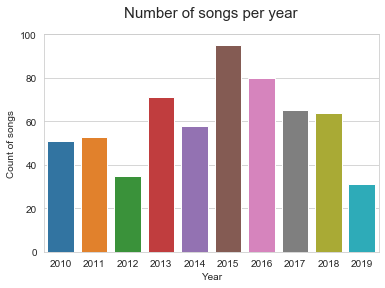

In [15]:
sns.set_style("whitegrid") 

g= sns.countplot(x= 'Year', data= df)
g.set(xlabel="Year", ylabel=("Count of songs"))
g.set_title('Number of songs per year', size= 15, y= 1.05)
g.set_ylim(0,100)

plt.show()

# 3.3

In [ ]:
df.shape

# 3.4

In [ ]:
df.isnull().sum() 

# 3.5 Dispersion

In [ ]:
df.columns

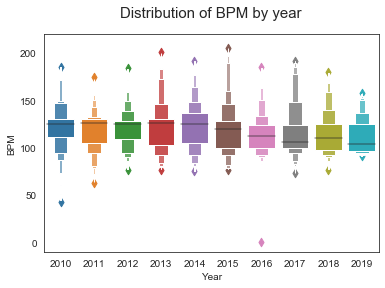

In [5]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='BPM')

g.set_title("Distribution of BPM by year", size= 15, y= 1.05) 
g.set(xlabel= 'Year', ylabel= 'BPM', ylim= (-10,220)) 
plt.show() 

# 3.6

In [ ]:
df[df["BPM"] == 0]

# 3.7

In [6]:
df.drop(442, inplace= True)

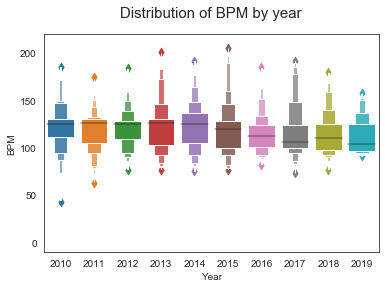

In [8]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='BPM')

g.set_title("Distribution of BPM by year", size= 15, y= 1.05) 
g.set(xlabel= 'Year', ylabel= 'BPM', ylim= (-10,220)) 
plt.show() 

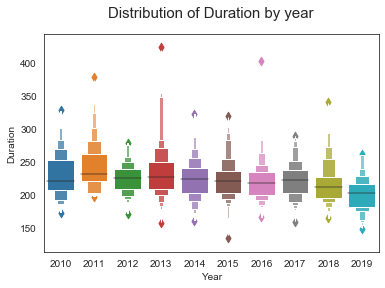

In [12]:
sns.set_style("white") 
g= sns.boxenplot(data=df, x='Year', y='Duration')

g.set_title("Distribution of Duration by year", size= 15, y= 1.05) 
g.set(xlabel= 'Year', ylabel= 'Duration') 
plt.show() 

# 3.8

In [13]:
df[df['Duration']<140]

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
330,Mark My Words,Justin Bieber,canadian pop,2015,114,26,38,-9,52,134,88,3,63


# 3.9

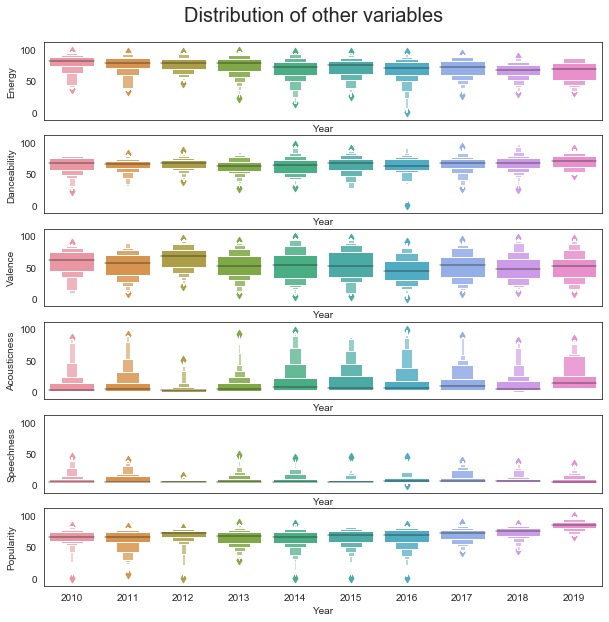

In [79]:
sns.set_style("white")

fig, (ax0, ax1, ax2, ax3, ax4, ax5)= plt.subplots(nrows=6,
                                                  ncols=1, 
                                                  sharex= True, 
                                                  sharey=True, 
                                                  figsize=(10,10))

sns.boxenplot(data=df, x='Year', y='Energy', ax= ax0)
sns.boxenplot(data=df, x='Year', y='Danceability', ax= ax1)
sns.boxenplot(data=df, x='Year', y='Valence', ax= ax2)
sns.boxenplot(data=df, x='Year', y='Acousticness', ax= ax3)
sns.boxenplot(data=df, x='Year', y='Speechness', ax= ax4)
sns.boxenplot(data=df, x='Year', y='Popularity', ax= ax5)


fig.suptitle("Distribution of other variables", size= 20, y= 0.93)  
ax5.set(xlabel= 'Year') 
plt.show() 

# 3.10

In [14]:
df[df['Title'] == 'FourFiveSeconds']

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Valence,Duration,Acousticness,Speechness,Popularity
276,FourFiveSeconds,Rihanna,barbadian pop,2015,206,27,58,-6,35,188,88,5,80


In [5]:
years = list(df['Year'].unique())
datas= {}

for year in years:
    df_year = df[df['Year'] == year]
    datas[year] = df_year

# 4.1

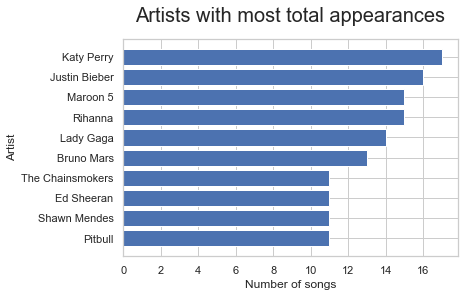

In [17]:
artists = df.Artist.value_counts().sort_values()
top_artists= artists[artists > 10]
fig, ax = plt.subplots()

sns.set_style("whitegrid") 
ax.barh(top_artists.index, top_artists)

ax.set_xlabel('Number of songs')
ax.set_ylabel('Artist')
ax.set_title("Artists with most total appearances", y= 1.05, size= 20)
plt.show()

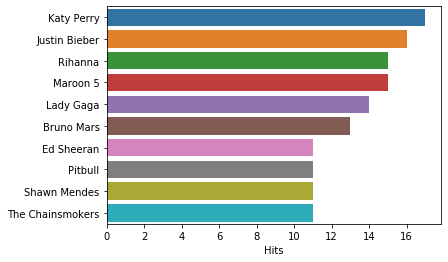

In [10]:
hits = df.Artist.value_counts().sort_values(ascending = False)
hits = pd.DataFrame(hits)
hits.columns= ['Hits']
top_artists= hits[hits['Hits'] > 10]

sns.barplot(data=top_artists, x='Hits', y= top_artists.index) 

plt.show() 

# 4.2

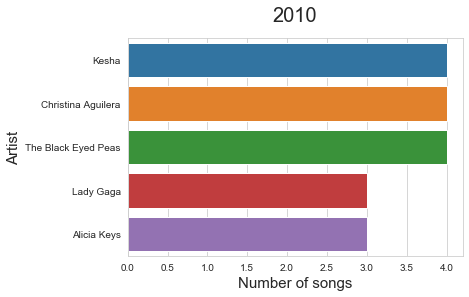

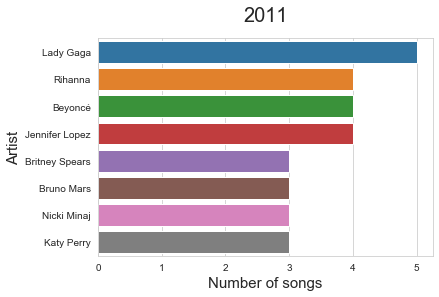

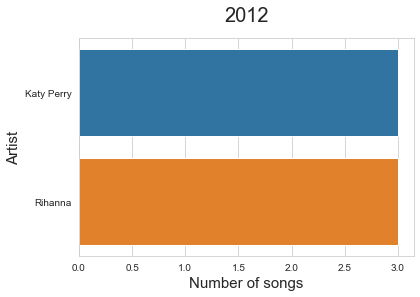

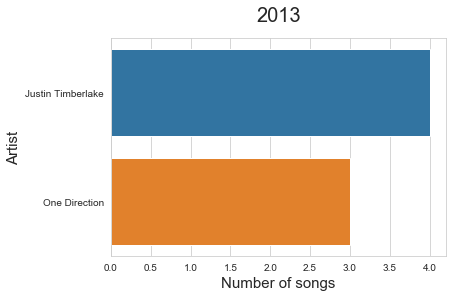

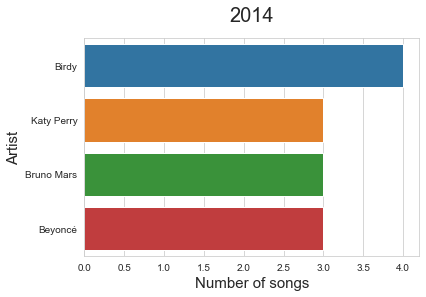

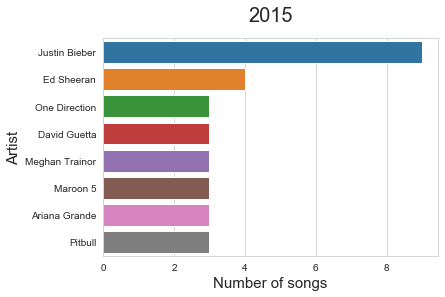

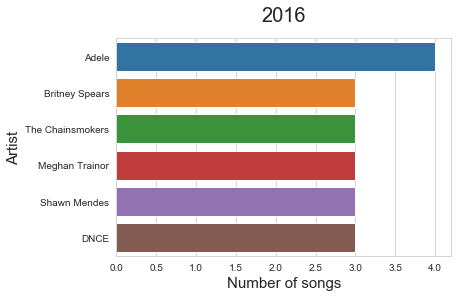

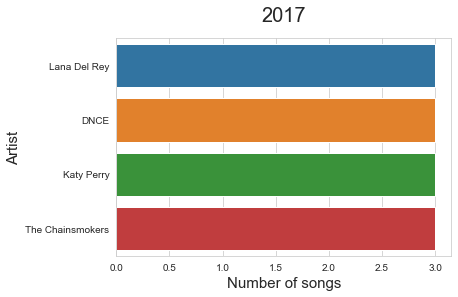

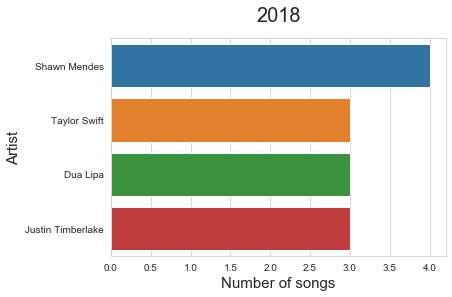

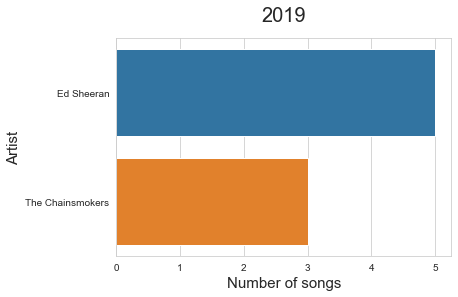

In [19]:
years = list(df['Year'].unique())

for year in years:
    
    data = df[df['Year'] == year]
    hits = data.Artist.value_counts().sort_values(ascending = False)
    hits = pd.DataFrame(hits)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]
    
    sns.set_style("whitegrid") 
    
    fig, ax = plt.subplots()
    sns.barplot(data=top_artists, x='Hits', y= top_artists.index) 
    ax.set_xlabel('Number of songs', size= 15)
    ax.set_ylabel('Artist', size= 15)
    ax.set_title(year, y= 1.05, size= 20)

    plt.show()

ValueError: not enough values to unpack (expected 10, got 5)

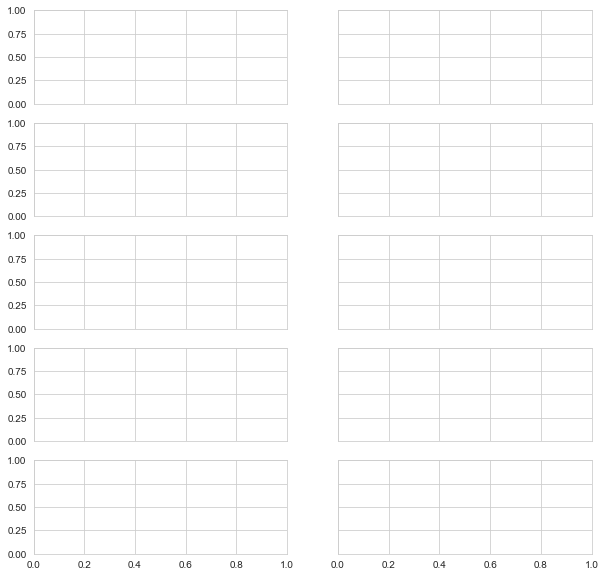

In [48]:
years = range(2010, 2020)
indexes= range(0,10)

fig, (ax_0, ax_1, ax_2, ax_3, ax_4, ax_5, ax_6, ax_7, ax_8, ax_9) = plt.subplots(nrows=5, ncols=2, sharex= True, sharey=True, figsize=(10,10)) 

for y, i in zip(years, indexes):
    
    data = df[df['Year'] == year]
    hits = data.Artist.value_counts().sort_values()
    hits= pd.DataFrame(artists)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]
    
    sns.barplot(data= top_artists, x='Hits', y= top_artists.index, ax= ax_i)


ValueError: not enough values to unpack (expected 10, got 5)

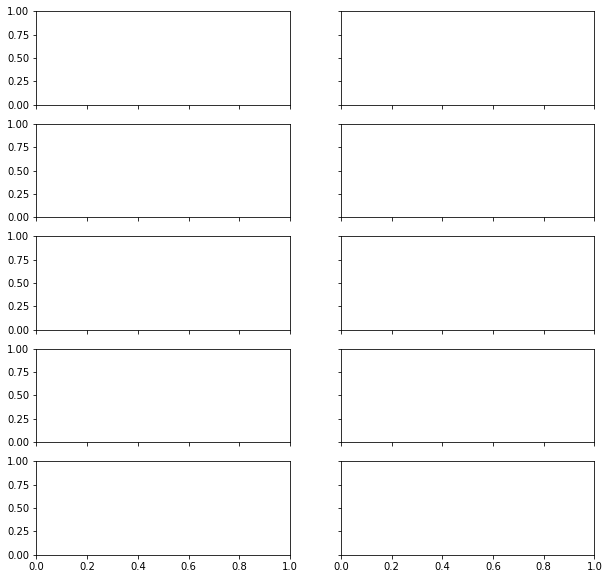

In [7]:
years = range(2010, 2020)
indexes= range(0,10)

fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=5, ncols=2, sharex= True, sharey=True, figsize=(10,10)) 

for y, i in zip(years, indexes):
    
    data = df[df['Year'] == year]
    hits = data.Artist.value_counts().sort_values()
    hits= pd.DataFrame(hits)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]
    
    sns.barplot(data= top_artists, x='Hits', y= top_artists.index, ax= ax + str(i))

Text(0.5, 0.98, 'Fede')

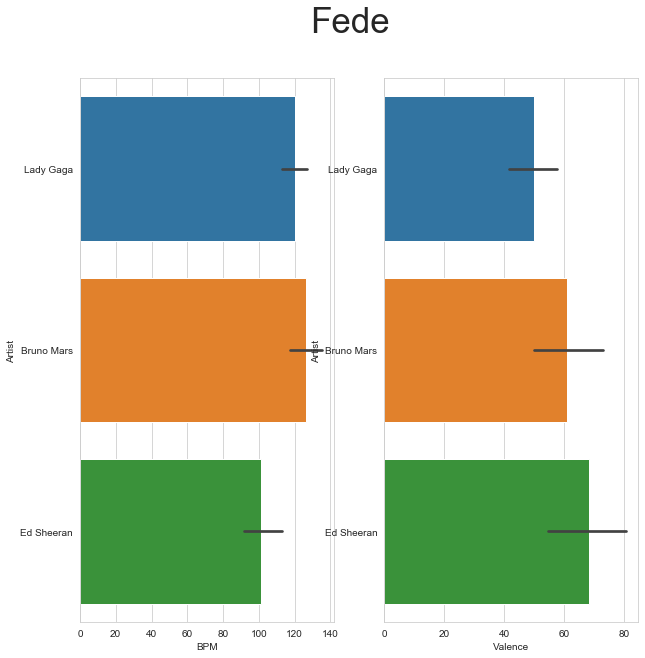

In [49]:
fede= df[df['Artist'].isin(['Bruno Mars', 'Lady Gaga', 'Ed Sheeran'])]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex= True, sharey=True, figsize=(10,10)) 

plt.subplot(1,2,1)
sns.barplot(data=fede, x='BPM', y= 'Artist')
ax1.set(xlim= (0,200))

plt.subplot(1,2,2)
sns.barplot(data=fede, x='Valence', y= 'Artist')

fig.suptitle('Fede', size= 35)


NameError: name 'literal' is not defined

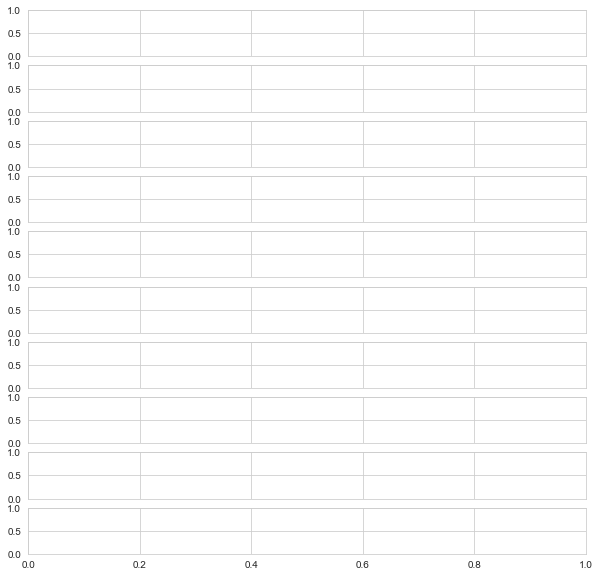

In [66]:
years = range(2010, 2020)
axes = ["ax0","ax1","ax2","ax3","ax4","ax5","ax6","ax7","ax8","ax9"]

fig, (ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(nrows=10, ncols=1, sharex= True, sharey=True, figsize=(10,10)) 

for y, i in zip(years, axes):
    
    data = df[df['Year'] == y]
    hits = data.Artist.value_counts().sort_values()
    hits= pd.DataFrame(hits)
    hits.columns= ['Hits']
    top_artists= hits[hits['Hits'] > 2]
    
    sns.barplot(data= top_artists, x='Hits', y= top_artists.index, ax= literal(i))

In [54]:
years = range(2010, 2020)
axes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

for y, i in zip(years, axes):
    print(str(y)+i)

2010a
2011b
2012c
2013d
2014e
2015f
2016g
2017h
2018i
2019j


# 4.3 Songs per artist

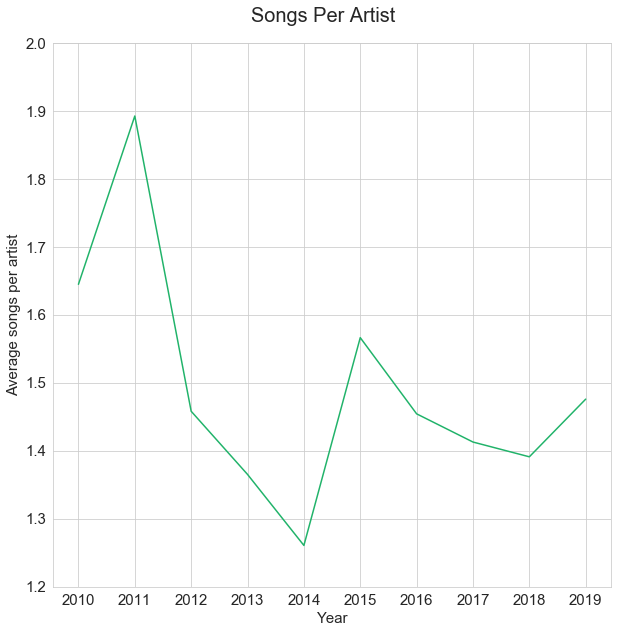

In [59]:
# Calculate the average number of songs per artist for each year

years = list(df['Year'].unique())
artist_counts= []
song_counts= []

for year in years:
    
    data = df[df['Year'] == year]
    unique_artists = data["Artist"].unique()
    artist_count = len(unique_artists)
    artist_counts.append(artist_count)
    unique_songs= data["Title"].unique()
    song_count= len(unique_songs)
    song_counts.append(song_count)
    
songs_per_artist = np.array(song_counts) / np.array(artist_counts)
dic= {"Year": years, "Songs per artist": list(songs_per_artist)}
songs_per_artist_df = pd.DataFrame(dic)


#Plot a timeline of the info

sns.set_style("whitegrid")
custom_palette= ["#21B36A"]
sns.set_palette(custom_palette)

fig, ax= plt.subplots(figsize= (10,10))
 
sns.lineplot(x= 'Year', y= 'Songs per artist', data= df2, ax= ax)
ax.set_xlabel('Year', size= 15)
ax.set_ylabel('Average songs per artist', size= 15)
ax.set_ylim((1.2,2))

plt.xticks(range(2010,2020), size= 15)
plt.yticks(size= 15)

fig.suptitle("Songs Per Artist", size= 20, y= 0.93) 

plt.show() 

# 4.4 Share of popularity

Text(0.5, 0.93, 'Share of popularity - Top 5 artists per year')

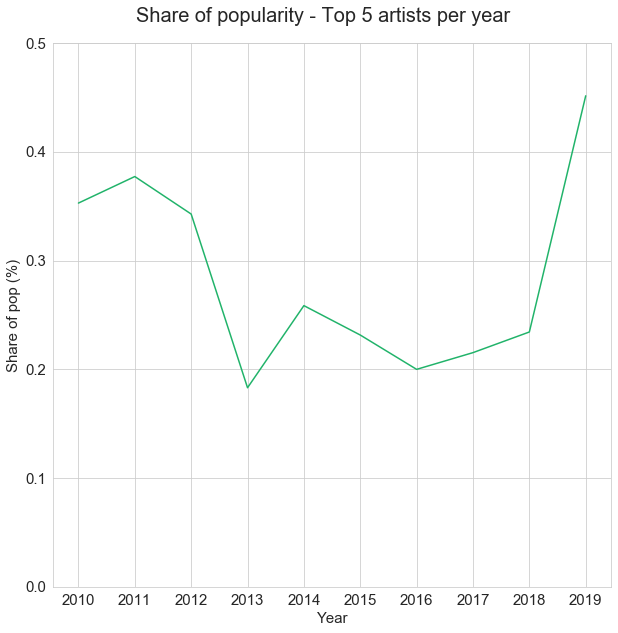

In [91]:
#Calculate each artist's share of popularity for each year

years = list(df['Year'].unique())
share_of_pop= {}
for year in years:
    
    data = df[df['Year'] == year]
    yearly_share = data["Artist"].value_counts(normalize= True)
    share_of_pop[year]= yearly_share
    
# Calculate the sum of popularity of the top 5 artists for each year
    
top_5 = []
for year in years:
    sum_top = share_of_pop[year][:5].sum()
    top_5.append(sum_top)
    
top_5_dict = {'Year':years, "Top 5": top_5} 
top_5_df = pd.DataFrame(top_5_dict)


# Plot the info

sns.set_style("whitegrid")
custom_palette= ["#21B36A"]
sns.set_palette(custom_palette)
fig, ax= plt.subplots(figsize= (10,10))

sns.lineplot(x= 'Year', y= 'Top 5', data= top_5_df, ax= ax)
ax.set_xlabel('Year', size= 15)
ax.set_ylabel('Share of pop (%)', size= 15)
ax.set_ylim((0,0.5))

plt.xticks(range(2010,2020), size= 15)
plt.yticks(size= 15)
fig.suptitle("Share of popularity - Top 5 artists per year", size= 20, y= 0.93) 


In [71]:
top_5_df

,Year,Top 5 artists
0,2010,0.352941
1,2011,0.377358
2,2012,0.342857
3,2013,0.183099
4,2014,0.258621
5,2015,0.231579
6,2016,0.200000
7,2017,0.215385
8,2018,0.234375
9,2019,0.451613


# 4.5 Median artist lifespan

In [38]:
# Median number of appearances (in years) in Billboard's list for all artists

yearly_app = df.groupby('Artist')["Year"].unique()
pop_lifespan= []
index= yearly_app.index

for i in index:
    number= len(yearly_app[i])
    pop_lifespan.append(number)
    
pop_lifespan_array = np.array(pop_lifespan)
lifespan_all= np.median(pop_lifespan_array)
lifespan_all

2.0

In [29]:
# Categorize into top, medium and small artists

hits = df.Artist.value_counts().sort_values(ascending = False)
hits = pd.DataFrame(hits)
hits.columns= ['Hits']

cats= {}
cats['top']= hits[hits['Hits'] > 10].index
cats['medium']= hits[(hits['Hits'] < 11) & (hits['Hits'] > 2)].index
cats['small'] = hits[hits['Hits'] < 3].index



In [31]:
# Calculate median lifespan for each category of artists

cats_iter= ["top", "medium", "small"]
medians= {}

for i in cats:
    filters = yearly_app.index.isin(cats[i])
    app= yearly_app[filters]
    lifespan = []

    for x in app.index:
        number= len(yearly_app[x])
        lifespan.append(number)

    array = np.array(lifespan)
    indic= np.median(array)
    medians[i]= indic
    
print(medians)

{'top': 6.0, 'medium': 3.0, 'small': 1.0}


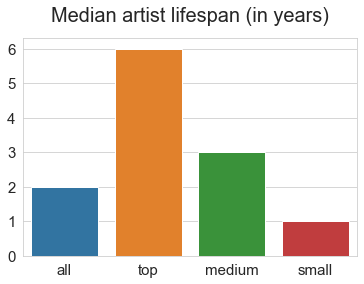

In [52]:
categories= ["all", "top", "medium", "small"]
lifespan= [lifespan_all, medians["top"], medians["medium"], medians["small"]]

g= sns.barplot(x= categories, y= lifespan)
g.set_title("Median artist lifespan (in years)", size= 20, y= 1.05)

plt.xticks(size= 15)
plt.yticks(size= 15)

plt.show()

In [40]:
lifespan

[2.0, 6.0, 3.0, 1.0]

In [108]:
# Mean number of appearances (in years) in Billboard's list for top artists
 

filter_top = yearly_app.index.isin(top)
top_app= yearly_app[filter_top]
top_lifespan = []

for i in top_app.index:
    number= len(yearly_app[i])
    top_lifespan.append(number)
    
top_array = np.array(top_lifespan)
np.mean(top_array)

6.3

In [107]:
# Mean number of appearances (in years) in Billboard's list for medium artists
 

filter_medium = yearly_app.index.isin(medium)
medium_app= yearly_app[filter_medium]
medium_lifespan = []

for i in medium_app.index:
    number= len(yearly_app[i])
    medium_lifespan.append(number)
    
medium_array = np.array(medium_lifespan)
np.mean(medium_array)

3.948717948717949

In [106]:
# Mean number of appearances (in years) in Billboard's list for small artists
 

filter_small = yearly_app.index.isin(small)
small_app= yearly_app[filter_small]
small_lifespan = []

for i in small_app.index:
    number= len(yearly_app[i])
    small_lifespan.append(number)
    
small_array = np.array(small_lifespan)
np.mean(small_array)

1.4222222222222223

# Evolution of characteristics

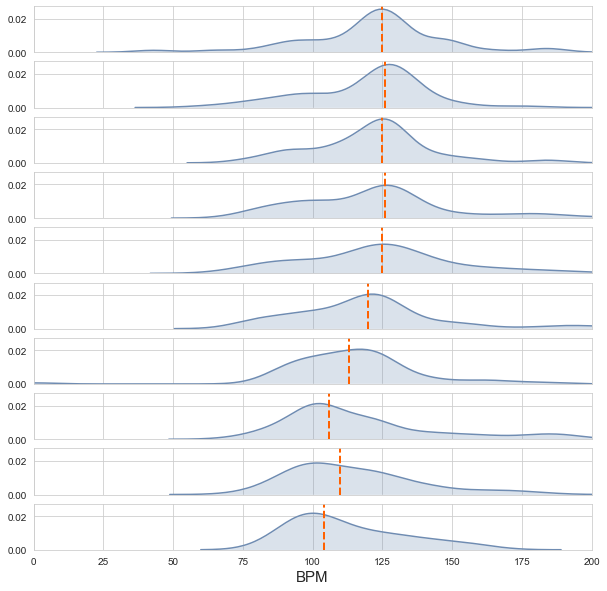

In [19]:
sns.set_style("whitegrid")
custom_palette= ["#6F8CB2"]
sns.set_palette(custom_palette)


fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10,ncols=1, sharex= True, sharey=True, figsize=(10,10))

sns.distplot(df.query('Year == "2010"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax0)
sns.distplot(df.query('Year == "2011"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax1)
sns.distplot(df.query('Year == "2012"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax2)
sns.distplot(df.query('Year == "2013"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax3)
sns.distplot(df.query('Year == "2014"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax4)
sns.distplot(df.query('Year == "2015"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax5)
sns.distplot(df.query('Year == "2016"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax6)
sns.distplot(df.query('Year == "2017"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax7)
sns.distplot(df.query('Year == "2018"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax8)
sns.distplot(df.query('Year == "2019"')['BPM'], hist=False, kde_kws={'shade':True}, ax=ax9)


ax0.set(xlabel= "")
ax0.axvline(x= df.query('Year == "2010"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax1.set(xlabel= "")
ax1.axvline(x= df.query('Year == "2011"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax2.set(xlabel= "")
ax2.axvline(x= df.query('Year == "2012"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax3.set(xlabel= "")
ax3.axvline(x= df.query('Year == "2013"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax4.set(xlabel= "")
ax4.axvline(x= df.query('Year == "2014"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax5.set(xlabel= "")
ax5.axvline(x= df.query('Year == "2015"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax6.set(xlabel= "")
ax6.axvline(x= df.query('Year == "2016"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax7.set(xlabel= "")
ax7.axvline(x= df.query('Year == "2017"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax8.set(xlabel= "")
ax8.axvline(x= df.query('Year == "2018"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

ax9.set_xlim(0, 200)
ax9.set_xlabel("BPM", size= 15)
ax9.axvline(x= df.query('Year == "2019"')['BPM'].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)



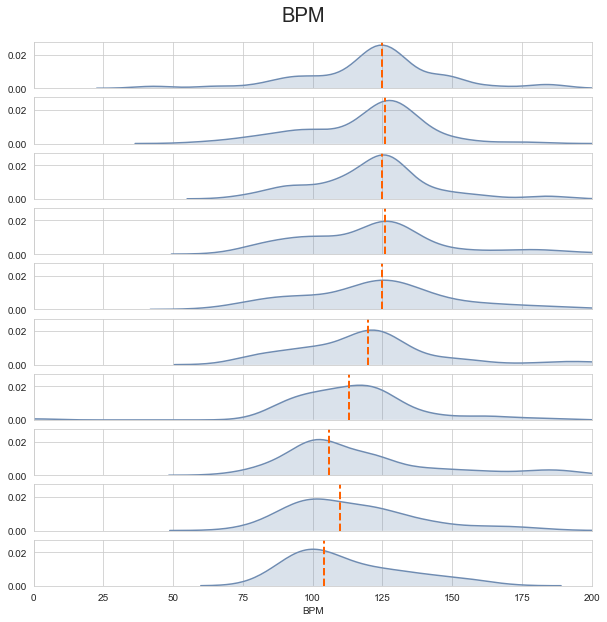

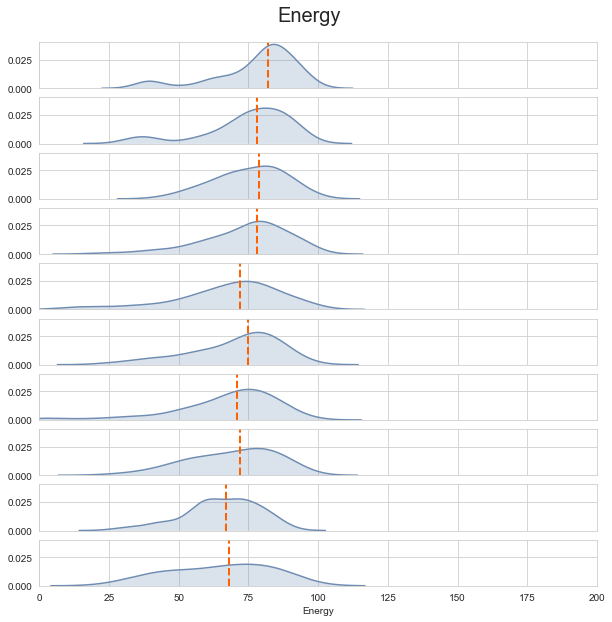

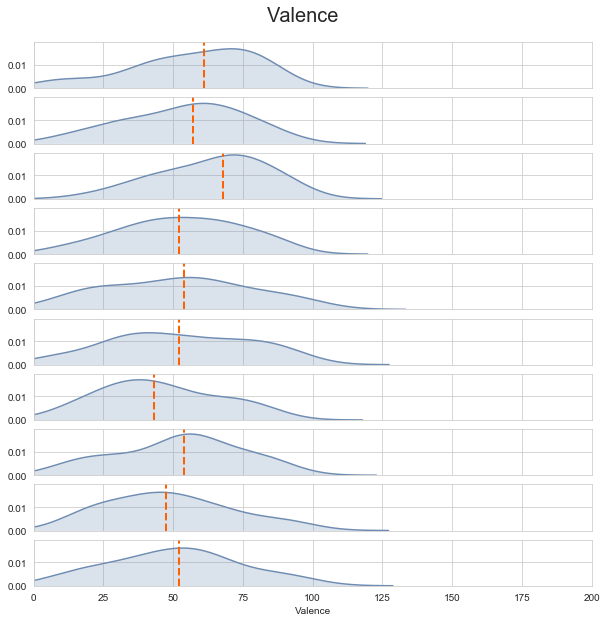

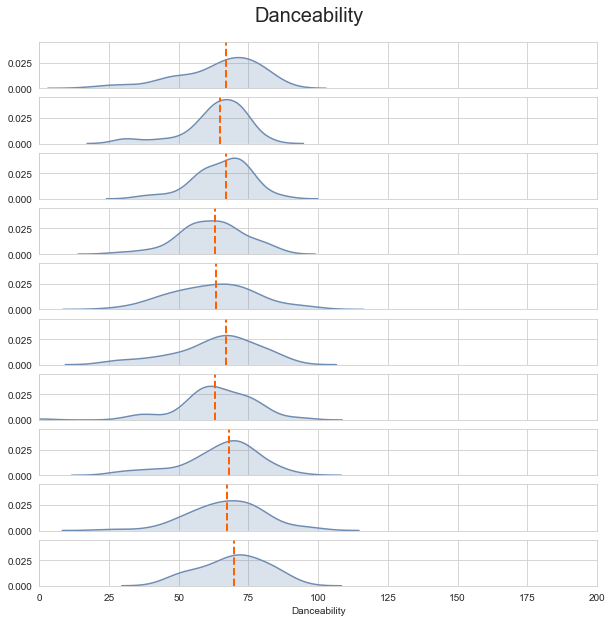

In [108]:
variables= ['BPM', 'Energy', 'Valence', 'Danceability']

for i in variables:
    
    sns.set_style("whitegrid")
    custom_palette= ["#6F8CB2"]
    sns.set_palette(custom_palette)


    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10,ncols=1, sharex= True, sharey=True, figsize=(10,10))

    sns.distplot(df.query('Year == "2010"')[i], hist=False, kde_kws={'shade':True}, ax=ax0)
    sns.distplot(df.query('Year == "2011"')[i], hist=False, kde_kws={'shade':True}, ax=ax1)
    sns.distplot(df.query('Year == "2012"')[i], hist=False, kde_kws={'shade':True}, ax=ax2)
    sns.distplot(df.query('Year == "2013"')[i], hist=False, kde_kws={'shade':True}, ax=ax3)
    sns.distplot(df.query('Year == "2014"')[i], hist=False, kde_kws={'shade':True}, ax=ax4)
    sns.distplot(df.query('Year == "2015"')[i], hist=False, kde_kws={'shade':True}, ax=ax5)
    sns.distplot(df.query('Year == "2016"')[i], hist=False, kde_kws={'shade':True}, ax=ax6)
    sns.distplot(df.query('Year == "2017"')[i], hist=False, kde_kws={'shade':True}, ax=ax7)
    sns.distplot(df.query('Year == "2018"')[i], hist=False, kde_kws={'shade':True}, ax=ax8)
    sns.distplot(df.query('Year == "2019"')[i], hist=False, kde_kws={'shade':True}, ax=ax9)


    ax0.set(xlabel= "")
    ax0.axvline(x= df.query('Year == "2010"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax1.set(xlabel= "")
    ax1.axvline(x= df.query('Year == "2011"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax2.set(xlabel= "")
    ax2.axvline(x= df.query('Year == "2012"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax3.set(xlabel= "")
    ax3.axvline(x= df.query('Year == "2013"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax4.set(xlabel= "")
    ax4.axvline(x= df.query('Year == "2014"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax5.set(xlabel= "")
    ax5.axvline(x= df.query('Year == "2015"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax6.set(xlabel= "")
    ax6.axvline(x= df.query('Year == "2016"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax7.set(xlabel= "")
    ax7.axvline(x= df.query('Year == "2017"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax8.set(xlabel= "")
    ax8.axvline(x= df.query('Year == "2018"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)

    ax9.set_xlim(0, 200)
    ax9.axvline(x= df.query('Year == "2019"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)
    
    fig.suptitle(i, size= 20, y= 0.93)


# 4.8

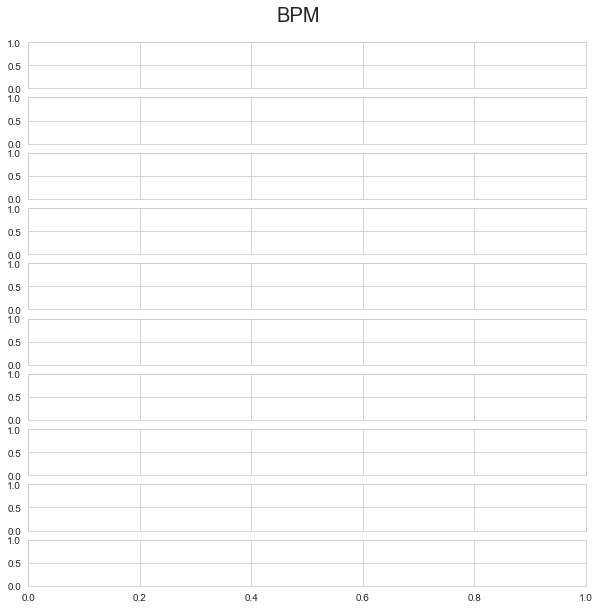

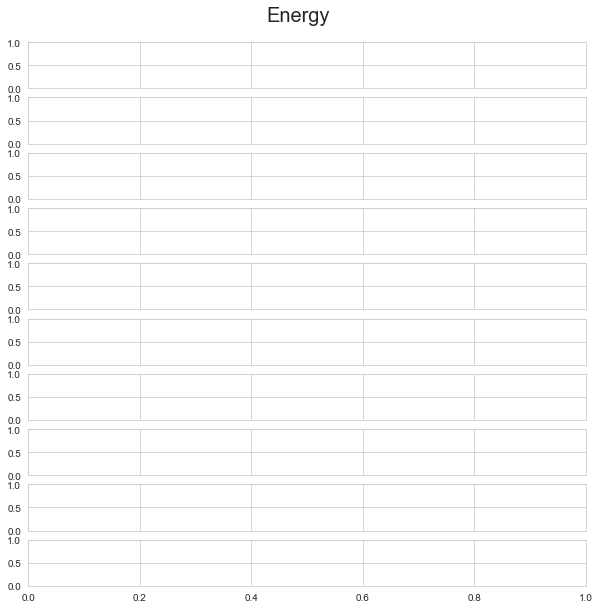

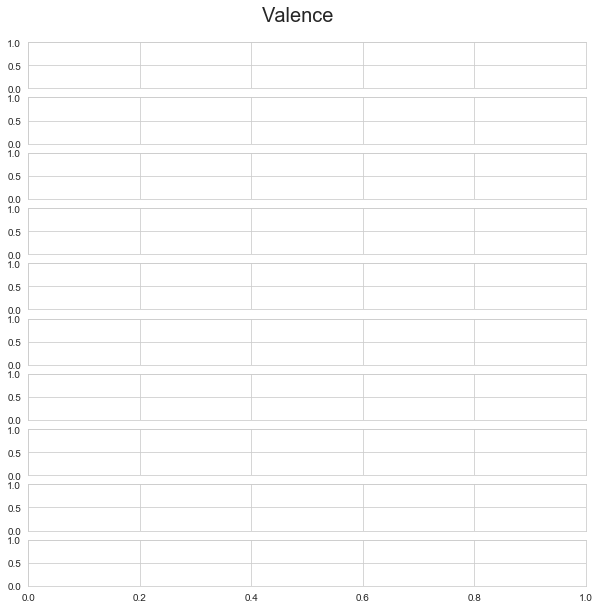

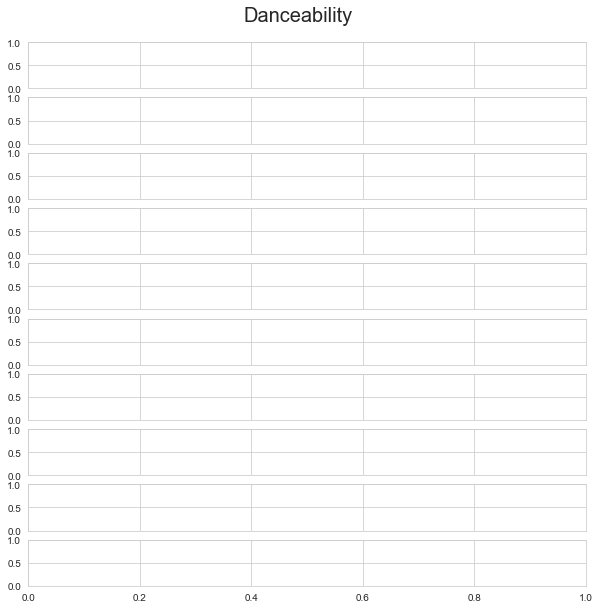

In [52]:
variables= ['BPM', 'Energy', 'Valence', 'Danceability']
years = list(df['Year'].unique())
fede= [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

for i in variables:
    
    sns.set_style("whitegrid")
    custom_palette= ["#6F8CB2"]
    sns.set_palette(custom_palette)

    fig, (ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(nrows=10,ncols=1, sharex= True, sharey=True, figsize=(10,10))

    for y, a in zip(years, axes):
        
        sns.distplot(df.query('Year == "y"')[i], hist=False, kde_kws={'shade':True}, ax=a)
            
        a.set(xlabel= "fede")
        a.axvline(x= df.query('Year == "y"')[i].median(), color='#FF6100', label='Median', linestyle='--', linewidth=2)
    
    fig.suptitle(i, size= 20, y= 0.93)

In [53]:
years


In [54]:
fede

artists_2= df.groupby('artist').value_counts().sort_values(ascending= False)
artists_2

In [ ]:
years = list(df['year'].unique())

for year in years:
    
    data = df[df['year'] == year]
    artists = data.artist.value_counts()
    top_artists= artists[artists > 1]
    top_artists.plot(kind = 'bar')
    plt.title(year)
    plt.show()
    

In [ ]:
pmf_year = Pmf.from_seq(df['year'], normalize= False)

# Plot the PMF
pmf_year.bar()

# Label the axes
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
pmf_val = Pmf.from_seq(df['val'], normalize= False)

# Plot the PMF
pmf_val.bar()
# Label the axes
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
fig, ax = plt.subplots()

years = df['Year'].unique()
# Loop over the different sports branches
for year in years:
  # Extract the rows only for this sport
  year_df = df[df['Year'] == year]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(year, year_df['BPM'].median(), yerr= year_df['BPM'].std())

ax.set_ylabel("BPM")
ax.set_xticklabels(df['Year'].unique().sort_values(), rotation= 90)
plt.show()

In [ ]:
years = list(df['year'].unique())

for year in years:
    
    data = df[df['year'] == year]

    sns.set(style="ticks")

    f, ax = plt.subplots(sharex= True, sharey= True)

    sns.distplot(data['bpm'], ax=ax, bins= 10)

    sns.despine(ax=ax)
    ax.set_title(year, size= 25) 
    ax.set_ylim(0,0.05)
    
    plt.show()


In [ ]:
datas = []

for year in range(2010,2020):
    data= df[df['year'] == year]
    datas.append(data)
    
# Create the graphs
    
f, ax = plt.subplots(10, sharex= True, sharey= True)
    
for i in range(0,10):
    sns.distplot(datas[i]['bpm'], ax=ax[i], bins= 10)
    


In [ ]:
df.groupby('artist')['year'].unique()

In [ ]:
datas = []

for year in range(2010,2020):
    data= df[df['Year'] == year]
    datas.append(data)
    
# Create the graphs
    
f, ax = plt.subplots(10, sharex= True, sharey= True)
    
for i in range(0,10):
    sns.distplot(datas[i]['BPM'], ax=ax[i], bins= 10)

In [ ]:
datas = []

for year in range(2010,2020):
    data= df[df['Year'] == year]
    datas.append(data)
    
# Create the graphs
sns.set_style('whitegrid')  
sns.set_context("poster") 
f, ax = plt.subplots(10, sharex= True, sharey= True)
    
for i in range(0,10):
    sns.distplot(datas[i]['BPM'], ax=ax[i], bins= 10, hist= False, kde_kws={'shade':True})